<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

X_train, X_test_cv, y_train, y_test_cv = train_test_split(X, y, test_size=0.4, random_state=15)

X_cv, X_test, y_test, y_cv = train_test_split(X_test_cv, y_test_cv, test_size=0.5, random_state=15)

clf = SVC(gamma = 0.001, C= 100)
clf.fit(X_train,y_train)

dual_coef = clf.dual_coef_[0]
# print (len(dual_coef))

intercept = clf.intercept_[0]
# print (intercept)

sup_vec = clf.support_vectors_
# print (len(sup_vec))



def decision_function(X_cv, sup_vec, dual_coef, intercept,gamma = 0.001):
    f_cv = []
    for 𝑥_𝑞 in X_cv:
        sum_q = 0
        for i in range(0,len(sup_vec)):
#             print (sup_vec[i])
            norm2 = np.linalg.norm(sup_vec[i] - x_q)
            k = np.exp(-gamma*(norm2**2))
            sum_q += dual_coef[i]*k
        f_q = sum_q + intercept
        f_cv.append(f_q)
    return f_cv

In [3]:
f_cv = decision_function(X_cv,sup_vec,dual_coef,intercept)
# print (len(f_cv))

val =  clf.decision_function(X_cv)
# print (len(val))

check = f_cv[15:25] -  val[15:25]
print (check)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [4]:
n_plus = np.shape(np.where(y_train == 1))[1]
n_minus = np.shape(np.where(y_train == 0))[1]

y_plus = (n_plus+1)/(n_plus+2)
y_minus = 1/(n_minus + 2)

y_cv = np.where(y_cv == 1,y_plus,y_minus)
f_cv = np.array(f_cv).reshape(-1,1)

In [5]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros_like(dim)
    b = 0
    return w,b

def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z))
    return sigmoid

def loss_function(y_true,y_pred):
    '''In this function, we will compute log loss '''
    n = len(y_true)
    loss_temp = 0
    for i in range(0,n):
        temp = y_true[i]*np.log10(y_pred[i]) + ((1-y_true[i])*np.log10(1-y_pred[i]))
        loss_temp+=temp
    loss = -1 * ((loss_temp)/n)
    return loss

def gradient_dw(f_cv,y_cv,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = np.zeros(len(w)) 
    z = sigmoid(np.matmul(np.transpose(w),f_cv) + b)
    dw = f_cv*(y_cv-z) -(alpha/N)*w
    return dw

def gradient_db(f_cv,y_cv,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = sigmoid(np.matmul(np.transpose(w),f_cv) + b)
    db = y_cv - z
    return db

def train(f_cv,y_cv,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    w,b = initialize_weights(f_cv[0])
    cv_loss = np.zeros(epochs)
    f_cv_pred = np.zeros(len(f_cv)) 

 
    for epoch in tqdm(range(0,epochs)):
        for i in range(len(f_cv)):
            dw = gradient_dw(f_cv[i],y_cv[i],w,b,alpha,N)
            db = gradient_db(f_cv[i],y_cv[i],w,b)
            w  = w + eta0*dw
            b  = b + eta0*db
            
        for i in range(len(f_cv)):
            f_cv_pred[i] = sigmoid(np.dot(w,f_cv[i])+b)
            
        cv_loss[epoch] = loss_function(y_cv,f_cv_pred)
        
    return w,b,cv_loss

In [6]:
alpha=0.0001
eta0=0.0001
N=len(f_cv)
epochs= 14
w,b,cv_loss = train(f_cv,y_cv,epochs,alpha,eta0)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 25.07it/s]


[0.12579337]
-0.188546075233539


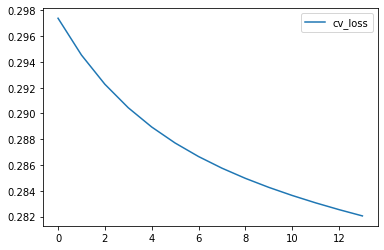

In [7]:
print (w)
print (b)

epochs = np.arange(0, 14, 1)
plt.plot(epochs,cv_loss)
plt.legend(["cv_loss"], loc ="upper right")

In [8]:
f_test = decision_function(X_test,sup_vec,dual_coef,intercept)

In [9]:
predict_proba = []
for i in range(0,len(f_test)):
    f_test_proba = sigmoid(np.dot(w,f_test[i])+b)
    predict_proba.append(f_test_proba)